In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/gursi/Desktop/ML/Datasets/FuelConsumption.csv')
df = df[['FUELCONSUMPTION_CITY','CO2EMISSIONS']]
df.rename(columns = {"FUELCONSUMPTION_CITY" : 'x', 'CO2EMISSIONS' : 'y'}, inplace = True)
df.head()

,x,y
0,9.9,196
1,11.2,221
2,6.0,136
3,12.7,255
4,12.1,244


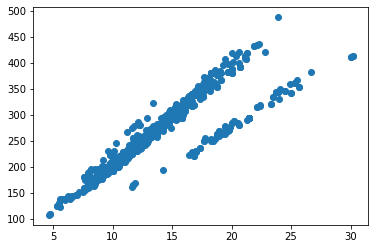

In [3]:
plt.scatter(df['x'], df['y'])
plt.show()

In [4]:
xvals = np.array(df['x'], ndmin = 1)
yvals = np.array(df['y'], ndmin = 1)

In [24]:
theta0 = 0
theta1 = 0
number_of_theta = 700
parameter_arr = range(0,number_of_theta)
to_plot_theta0 = []
to_plot_theta1 = []

for var1 in range(0,number_of_theta):
    theta1 = 0
    sum_of_errors = 0
    for var2 in range(0, len(xvals)):
        prediction = theta0 + theta1 * xvals[var2]
        error = (prediction - yvals[var2]) ** 2
        sum_of_errors = sum_of_errors + error
    
    to_plot_theta0.append(sum_of_errors/(2 * len(xvals)))

    theta0 += 1

for var1 in range(0,number_of_theta):
    theta0 = 0
    sum_of_errors = 0
    for var2 in range(0, len(xvals)):
        prediction = theta0 + theta1 * xvals[var2]
        error = (prediction - yvals[var2]) ** 2
        sum_of_errors = sum_of_errors + error
    
    to_plot_theta1.append(sum_of_errors/(2 * len(xvals)))

    theta1 += 1

to_plot_theta0 = np.array(to_plot_theta0)
to_plot_theta1= np.array(to_plot_theta1)

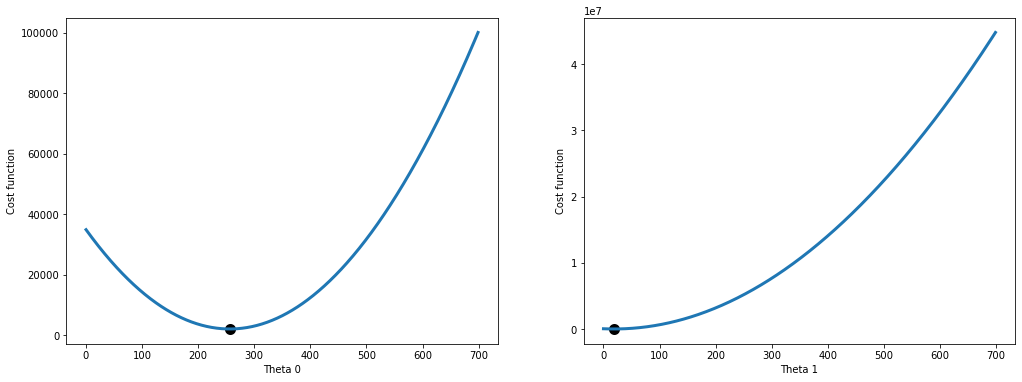

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17,6))

ax[0].plot(parameter_arr, to_plot_theta0, linewidth = 3)
ax[0].set_xlabel('Theta 0')
ax[0].set_ylabel('Cost function')
ax[0].scatter(parameter_arr[to_plot_theta0.argmin()], np.min(to_plot_theta0), linewidth = 5, c = 'black')

ax[1].plot(parameter_arr, to_plot_theta1, linewidth = 3)
ax[1].set_xlabel('Theta 1')
ax[1].set_ylabel('Cost function')
ax[1].scatter(parameter_arr[to_plot_theta1.argmin()], np.min(to_plot_theta1), linewidth = 5, c = 'black')

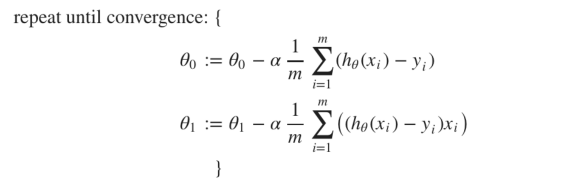

In [10]:
from skimage import io
image = io.imread('/Users/gursi/Desktop/ML/Course_notebooks/img.jpg')
plt.figure(figsize = (10,7))
plt.imshow(image)
plt.axis(False)
plt.show()

In [21]:
alpha = 0.2

t0 = 0
t1 = 0

for i in range(0,100):
    sum_of_errors0 = 0
    sum_of_errors1 = 0
    for i2 in range(0, len(xvals)):
        actual = yvals[i2]
        prediction = t0 + t1 * xvals[i2]
        error0 = (prediction) - actual
        error1 = error0 * xvals[i2]
        sum_of_errors0 = sum_of_errors0 + error0
        sum_of_errors1 = sum_of_errors1 + error1
    
    temp0 = t0 - alpha * (sum_of_errors0/len(xvals))
    temp1 = t1 - alpha * (sum_of_errors1/len(xvals))
    t0 = temp0
    t1 = temp1

In [22]:
def predict(xvalue):
    return t0 + t1 * xvalue

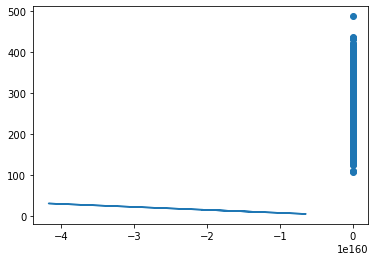

In [23]:
plt.scatter(df['x'], df['y'])
plt.plot(predict(xvals), xvals)
plt.show()